# 공공데이터 과제3_0718
1. 대구시의 7개 구별 (중구, 동구, 서구, 남구, 북구, 수성구, 달서구) 남녀 비율 및 대구시
전체의 남녀 비율을 각각의 파이 차트로 나타내시오.
- subplots를 이용하여 4x2 형태의 총 8개의 subplot을 파이 차트로 구현
- gender.csv 파일 사용

[1169571, 37920, 167608, 80623, 67750, 216414, 200508, 265202]
['대구광역시  ', '대구광역시 중구 ', '대구광역시 동구 ', '대구광역시 서구 ', '대구광역시 남구 ', '대구광역시 북구 ', '대구광역시 수성구 ', '대구광역시 달서구 ']


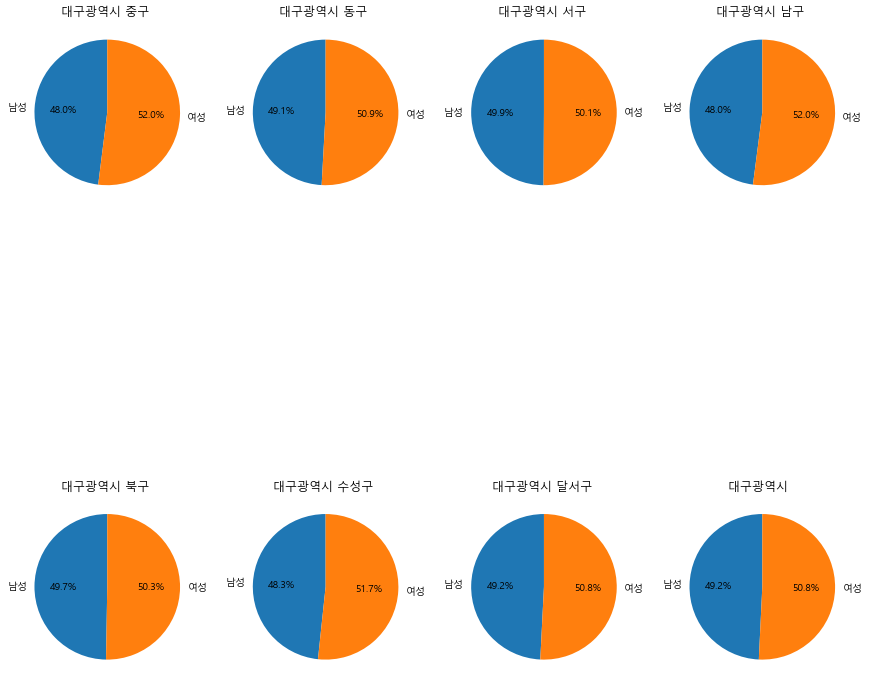

In [4]:
import csv
import platform
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

f = open("./data/gender.csv",encoding='euc_kr')
data = csv.reader(f)
header = next(data)

male_list =	[]
female_list = []
name_list = []

for row in data:
    row[0] = (re.split('[()]', row[0]))[0]
    if ('대구광역시'	in	row[0] and  (row[0].rstrip())[-1]=='구') or row[0].rstrip() =='대구광역시':
        male_list.append(int(row[104].replace(',','')))
        female_list.append(int(row[207].replace(',','')))
        name_list.append(row[0])            
f.close
print(male_list)
print(name_list)

# 그래프 그리기
fig, axes = plt.subplots(2,4, figsize=(15, 16),sharex=True,sharey=True)

for i in range(0,8):
    
    if	platform.system()	==	'Windows':
        plt.rc('font',	family='Malgun Gothic')
    else:
        plt.rc('font',	family='AppleGothic')
    
    if i==0:
        plt.subplot(2,4,8)
    else:
        plt.subplot(2,4,i)
    plt.pie([male_list[i],female_list[i]],labels=['남성','여성'],autopct='%.1f%%',startangle=90)      
    plt.title(name_list[i])
plt.show()    

# 판다스 풀이

In [ ]:
df = pd.read_csv('./data/gender.csv',encoding='euc_kr')
df['행정구역'] = df['행정구역'].astype(str)

df.head()

C:\Users\alstn\AppData\Local\Temp\ipykernel_23512\3706515695.py:1: DtypeWarning: Columns (99,100,101,102,103,197,198,199,200,305,306,309) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/gender.csv',encoding='euc_kr')


,행정구역,2022년06월_계_총인구수,2022년06월_계_연령구간인구수,2022년06월_계_0세,2022년06월_계_1세,2022년06월_계_2세,2022년06월_계_3세,2022년06월_계_4세,2022년06월_계_5세,2022년06월_계_6세,...,2022년06월_여_91세,2022년06월_여_92세,2022년06월_여_93세,2022년06월_여_94세,2022년06월_여_95세,2022년06월_여_96세,2022년06월_여_97세,2022년06월_여_98세,2022년06월_여_99세,2022년06월_여_100세 이상
0,서울특별시 (1100000000),"9,494,807","9,494,807","41,427","44,825","46,252","49,895","53,002","58,509","65,624",...,"5,724","4,973","4,121","3,099","2,320","1,472","1,040",766,722,"1,301"
1,서울특별시 종로구 (1111000000),"143,624","143,624",449,479,542,545,594,693,816,...,117,104,82,71,55,27,23,15,13,26
2,서울특별시 종로구 청운효자동(1111051500),"11,803","11,803",43,46,51,50,54,86,83,...,11,5,5,6,1,4,0,3,0,2
3,서울특별시 종로구 사직동(1111053000),"9,310","9,310",31,31,36,48,48,63,68,...,12,10,8,1,3,4,2,1,2,0
4,서울특별시 종로구 삼청동(1111054000),"2,386","2,386",3,7,4,4,12,8,13,...,1,5,1,2,0,0,1,0,0,2


In [ ]:
region_str_list=[]
daegu_list=[]

# 행정구역 str로 변경.
for region in df['행정구역']:
    region_str = re.split('[()]',region)
    region_str_list.append(region_str[0])    
df['행정구역'] = region_str_list    
#df.head()

# 대구전체, 대구 구만 추출
for region_str in df['행정구역']:
    if '대구광역시' in  region_str and len(region_str)<11:
        daegu_list.append(region_str)
#print(daegu_list)                
df=df[df['행정구역'].isin(daegu_list)]
#df.head()

# 남,여 전체 인구수만 추출
df=df.iloc[:,[0,104,207]]
df=df.drop(815)
print(df.head(8))
df.info()

# 인구수: object -> int 치환
df['2022년06월_남_총인구수']=df['2022년06월_남_총인구수'].str.replace(",","")
df['2022년06월_여_총인구수']=df['2022년06월_여_총인구수'].str.replace(",","")
print(df)

# 그래프용 리스트 만들기
name_label = list(df['행정구역'])
male = list(df['2022년06월_남_총인구수'].astype(int))
female = list(df['2022년06월_여_총인구수'].astype(int))

print(type(male[0]),male[0])

           행정구역 2022년06월_남_총인구수 2022년06월_여_총인구수
674     대구광역시         1,169,571       1,205,735
675   대구광역시 중구           37,920          41,064
688   대구광역시 동구          167,608         173,518
711   대구광역시 서구           80,623          80,919
729   대구광역시 남구           67,750          73,535
743   대구광역시 북구          216,414         218,717
767  대구광역시 수성구          200,508         214,409
791  대구광역시 달서구          265,202         273,822
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 674 to 791
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   행정구역             8 non-null      object
 1   2022년06월_남_총인구수  8 non-null      object
 2   2022년06월_여_총인구수  8 non-null      object
dtypes: object(3)
memory usage: 256.0+ bytes
           행정구역 2022년06월_남_총인구수 2022년06월_여_총인구수
674     대구광역시           1169571         1205735
675   대구광역시 중구            37920           41064
688   대구광역시 동구           167608          173518
71

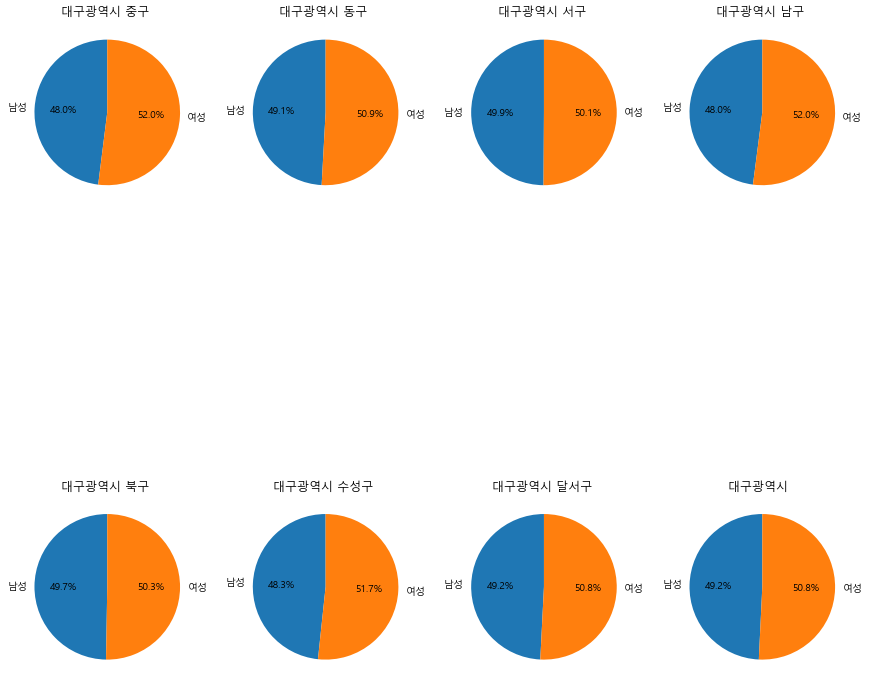

In [ ]:
# 그래프 그리기
fig, axes = plt.subplots(2,4, figsize=(15, 16),sharex=True,sharey=True)

for i in range(1,8):
    
    if	platform.system()	==	'Windows':
        plt.rc('font',	family='Malgun Gothic')
    else:
        plt.rc('font',	family='AppleGothic')
    
    plt.subplot(2,4,i)
    plt.pie([male[i],female[i]],labels=['남성','여성'],autopct='%.1f%%',startangle=90)      
    plt.title(name_label[i])

plt.subplot(2,4,8)
plt.pie([male[0],female[0]],labels=['남성','여성'],autopct='%.1f%%',startangle=90)      
plt.title(name_label[0])    
plt.show()    